<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/SVM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


# SVM регрессия (или SVR)

svm_regressor c epsilon = 0.3 и коэффициентам = [[-0.35375128]], [0.91963802]
svm_regressor c epsilon = 2 и коэффициентам = [[0.]], [0.23137417]
линейная регрессия с коэффициентам = [-0.36292135], 1.001755740136677


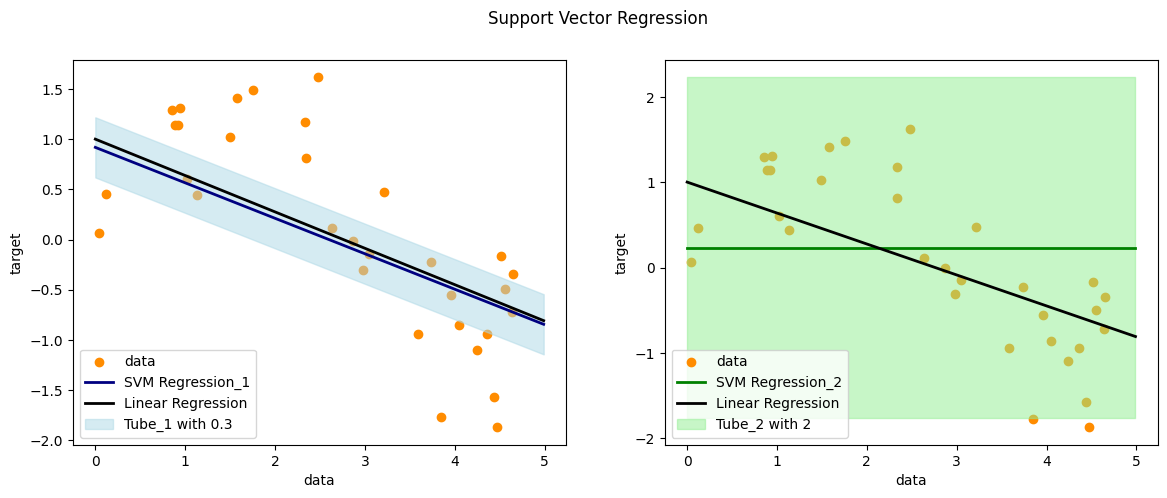

In [ ]:
# Создаем данные
np.random.seed(12345)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

# Задаем параметры epsilon
epsilon_1= 0.3
epsilon_2 = 2

# Обучаем SVM для регрессии
svm_regressor_1 = SVR(kernel='linear', C=1.0, epsilon=epsilon_1)
svm_regressor_1.fit(X_train, y_train)

svm_regressor_2 = SVR(kernel='linear', C=1.0, epsilon=epsilon_2)
svm_regressor_2.fit(X_train, y_train)

# обучим линейную регрессию
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Создаем тестовые данные для предсказания
X_new = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


# Получаем предсказания
y_pred_1 = svm_regressor_1.predict(X_new)
y_pred_2 = svm_regressor_2.predict(X_new)
y_pred_lin = lin_model.predict(X_new)


# Выводим коэффициенты
print(f'svm_regressor c epsilon = {epsilon_1} и коэффициентам = {svm_regressor_1.coef_}, {svm_regressor_1.intercept_}')
print(f'svm_regressor c epsilon = {epsilon_2} и коэффициентам = {svm_regressor_2.coef_}, {svm_regressor_2.intercept_}')
print(f'линейная регрессия с коэффициентам = {lin_model.coef_}, {lin_model.intercept_}')

fig = plt.figure(figsize=(14,5))
# Визуализируем результаты
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_1, color='navy', lw=2, label='SVM Regression_1')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_1 - svm_regressor_1.epsilon,
                 y_pred_1 + svm_regressor_1.epsilon,
                 color='lightblue', alpha=0.5, label=f'Tube_1 with {epsilon_1}')
plt.legend(loc='lower left')
plt.xlabel('data')
plt.ylabel('target')
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_2, color='green', lw=2, label='SVM Regression_2')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_2 - svm_regressor_2.epsilon,
                 y_pred_2 + svm_regressor_2.epsilon,
                 color='lightgreen', alpha=0.5, label=f'Tube_2 with {epsilon_2}')

plt.xlabel('data')
plt.ylabel('target')
plt.suptitle('Support Vector Regression')
plt.legend(loc='lower left')
plt.show()


Если значение `epsilon` в методе опорных векторов для задачи регрессии (SVR) выбрано слишком большим, это будет означать, что модель **станет более толерантной к ошибкам** и допустит большие отклонения между предсказанными значениями и истинными целевыми значениями.



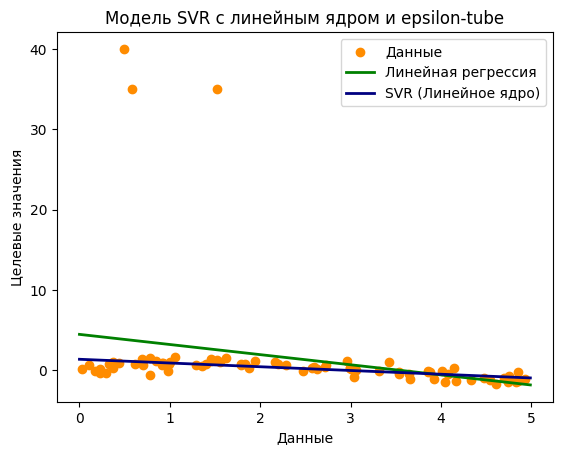

In [ ]:
# Создание искусственных данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))
y[10] = 40
y[11] = 35
y[30] = 35

# Обучение SVR с линейным ядром и трубкой (epsilon=0.1)
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svr_linear.fit(X, y)

lin_model = LinearRegression()
lin_model.fit(X, y)

# Создание сетки для построения графика
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Предсказание для сетки
y_pred = svr_linear.predict(X_test)
y_pred_lin = lin_model.predict(X_test)

# Построение графика
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_pred_lin, color='green', lw=2, label='Линейная регрессия')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR (Линейное ядро)')
plt.xlabel('Данные')
plt.ylabel('Целевые значения')
plt.title('Модель SVR с линейным ядром и epsilon-tube')
plt.legend()
plt.show()


При малых количествах выбросов SVR более устойчив

# Нелинейный SVM

##Рассмотрим пример нелинейной разделимости

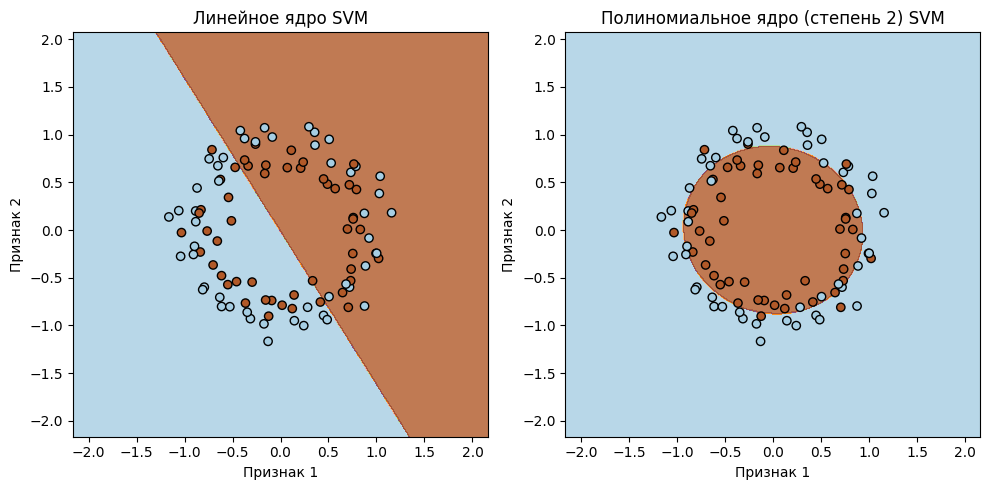

In [ ]:
# Создание нелинейно разделимой выборки
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

# Обучение SVM с линейным ядром
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Обучение SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=2)  # Указываем степень полинома (2 для квадрата переменных)
svm_poly.fit(X, y)

# Создание сетки для построения графика
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание классов для сетки с использованием обученных моделей
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Построение графика
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Линейное ядро SVM')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_poly, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Полиномиальное ядро (степень 2) SVM')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


## Ядерные функции

In [ ]:
# генерируем набор данных для классификации
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# добавляем случайный фактор для нашей генерации
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# создаем список из 3 наборов данных
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

# print(datasets[1])

In [ ]:
# инициализация дополнительных списков для будущих переборов
names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

print(names)
print(classifiers)

['Linear SVM', 'RBF SVM', 'Poly SVM', 'Sigmoid SVM']
[SVC(C=0.025, kernel='linear'), SVC(C=1, gamma=2), SVC(C=0.025, kernel='poly'), SVC(gamma=2, kernel='sigmoid')]


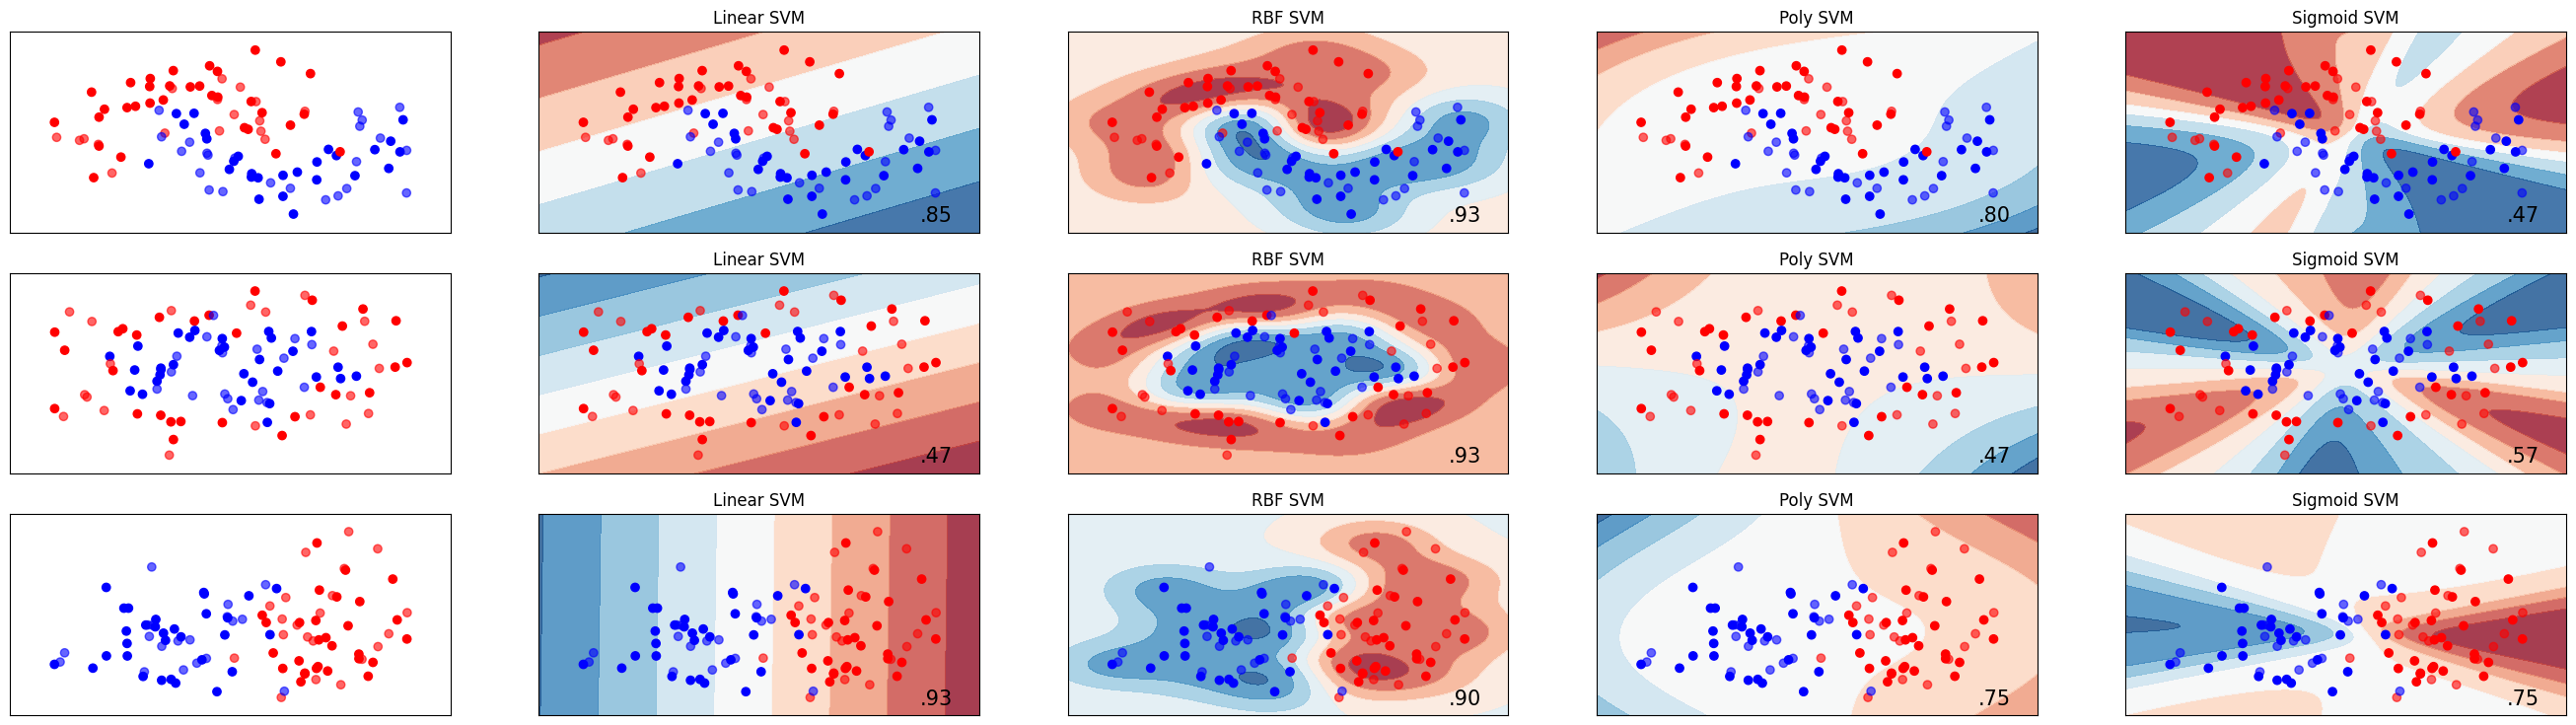

In [ ]:
# задаем размер шага движения
h = .02

# создаем фигуру с масштабом
figure = plt.figure(figsize=(27, 9))
i = 1

# итеративно проходим каждый набор из datasets
for ds in datasets:

    # в текущем набоое данных делаем масштабирование и разделение на test / training
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # документация https://pyprog.pro/array_creation/meshgrid.html
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # рисуем текущий набор данных
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # по текущему набору данных проходим по классификатору
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # рисуем
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # рисуем тренировочные точки
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # рисуем тестовые точки
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        # выводим score по модели
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## Нелинейный SVR

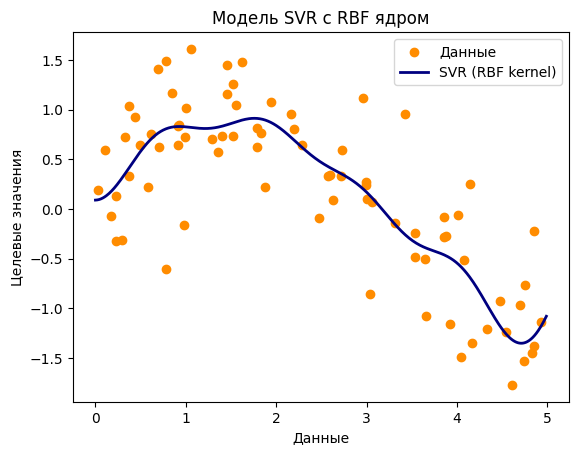

In [ ]:
# Создание искусственных данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))

# Обучение SVR
svr = SVR(kernel='rbf', C=100, gamma='auto')  # Используем радиальное базисное ядро (RBF)
svr.fit(X, y)

# Создание сетки для построения графика
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Предсказание для сетки
y_pred = svr.predict(X_test)

# Построение графика
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR (RBF kernel)')
plt.xlabel('Данные')
plt.ylabel('Целевые значения')
plt.title('Модель SVR с RBF ядром')
plt.legend()
plt.show()


# Дополнительно

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import l1_min_c
from sklearn.svm import LinearSVC
import numpy as np

# Создание случайных данных для примера
# X - матрица признаков, y - массив меток классов (0 или 1)
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Получить минимальное значение параметра C для L1 регуляризации
min_c = l1_min_c(X, y)
print(min_c)

# Использовать минимальное значение параметра C при обучении LinearSVC с L1 регуляризацией
model = LinearSVC(C=min_c, dual=False, max_iter=10000)
model.fit(X, y)

# Вывести значения параметров модели
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Проверка количества ненулевых весов (разреженность модели)
non_zero_coefficients = np.sum(model.coef_ != 0)
print("Number of non-zero coefficients:", non_zero_coefficients)


0.0005013035844589226
Intercept: [0.00612398]
Coefficients: [[ 0.27733578 -0.09206952 -0.00575351 -0.13448914 -0.07181165]]
Number of non-zero coefficients: 5
